In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

## Load dataset

**(This will not work unless you run the preprocessing notebook first)**

In [2]:
# Load the training data and the test inputs
X_train = pd.read_csv('X_train_clean_pca.csv') # inputs of the training set
y_train = pd.read_csv('y_train_clean.csv')['class'] # outputs of the training set

X_valid = pd.read_csv('X_valid_clean_pca.csv')
y_valid = pd.read_csv('y_valid_clean.csv')['class']

X_test = pd.read_csv('X_test.csv') # inputs of the test set

### Check

Check that splitting worked properly

## K-Nearest Neighbors

In [3]:
%%time

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 11, 1)}

grid_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', verbose=0)
grid_knn.fit(X_train, y_train)

print("The best parameters are: ", grid_knn.best_params_)

knn_model_final = grid_knn.best_estimator_

The best parameters are:  {'n_neighbors': 6}
Wall time: 1min 42s


### Accuracy

In [4]:
pred_knn = knn_model_final.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print(f'Accuracy on validation set: {acc_knn}')

Accuracy on validation set: 0.9727374075200163


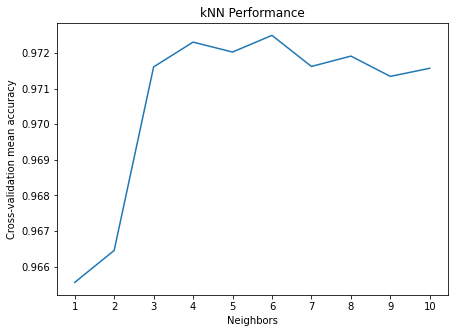

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, 11, 1), grid_knn.cv_results_['mean_test_score'])
plt.title('kNN Performance')
plt.xlabel('Neighbors')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('Cross-validation mean accuracy');

### Confusion Matrix

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     10479
         QSO       0.96      0.85      0.91      2068
        STAR       0.96      0.99      0.98      7187

    accuracy                           0.97     19734
   macro avg       0.97      0.94      0.95     19734
weighted avg       0.97      0.97      0.97     19734



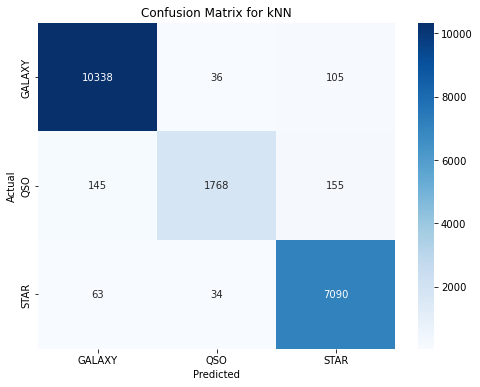

In [6]:
print(classification_report(y_valid, pred_knn))

cm = confusion_matrix(y_valid, pred_knn, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for kNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## Random Forests

In [17]:
%%time

rf_model = RandomForestClassifier()

param_grid = {'n_estimators': np.arange(10, 25, 2), 'max_depth': np.arange(5, 25, 5)}

grid_rf = GridSearchCV(rf_model, param_grid, scoring='accuracy', verbose=0)
grid_rf.fit(X_train, y_train)

print("The best parameters are: ", grid_rf.best_params_)

rf_model_final = grid_rf.best_estimator_

The best parameters are:  {'max_depth': 20, 'n_estimators': 22}
Wall time: 23min 59s


### Accuracy

In [18]:
pred_rf = rf_model_final.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print(f'Accuracy on validation set: {acc_rf}')

Accuracy on validation set: 0.9846964629573325


### Confusion Matrix

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99     10479
         QSO       0.99      0.92      0.95      2068
        STAR       0.99      0.99      0.99      7187

    accuracy                           0.98     19734
   macro avg       0.99      0.97      0.98     19734
weighted avg       0.98      0.98      0.98     19734



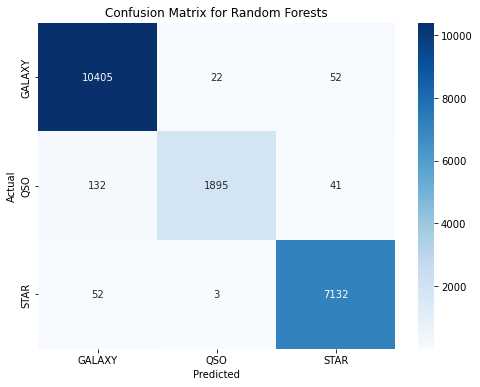

In [20]:
print(classification_report(y_valid, pred_rf))

cm = confusion_matrix(y_valid, pred_rf, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Random Forests')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### Feature Importance (This is probably useless since we did PCA)

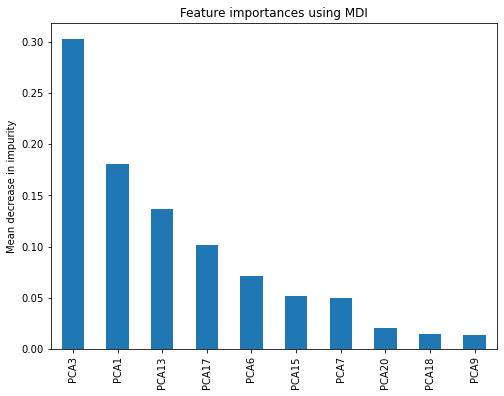

In [21]:
importances = rf_model_final.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
forest_importances[:10].plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show();

## Naive Bayes

Still garbage but not as bad as before

In [11]:
%%time

nb_model = GaussianNB()

param_grid = {}

grid_nb = GridSearchCV(nb_model, param_grid, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# print("The best parameters are: ", grid_nb.best_params_)

nb_model_final = grid_nb.best_estimator_

Wall time: 1.21 s


### Accuracy

In [12]:
pred_nb = nb_model_final.predict(X_valid)
acc_nb = accuracy_score(y_valid, pred_nb)
acc_nb

0.9129421303334346

## SVM

(This took almost 30 minutes to run)

In [13]:
%%time

svc_model = LinearSVC()

param_grid = {'C': np.logspace(-2, 2, 5), 'penalty': ['l1', 'l2']}

grid_svc = GridSearchCV(svc_model, param_grid, scoring='accuracy', verbose=0)
grid_svc.fit(X_train, y_train)

print("The best parameters are: ", grid_svc.best_params_)

svc_model_final = grid_svc.best_estimator_

The best parameters are:  {'C': 1.0, 'penalty': 'l2'}
Wall time: 21min 55s


### Accuracy

In [14]:
pred_svc = svc_model_final.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)
print(f'Accuracy on validation set: {acc_svc}')

Accuracy on validation set: 0.9880409445626837


### Confusion Matrix

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10479
         QSO       0.98      0.94      0.96      2068
        STAR       0.99      1.00      0.99      7187

    accuracy                           0.99     19734
   macro avg       0.99      0.97      0.98     19734
weighted avg       0.99      0.99      0.99     19734



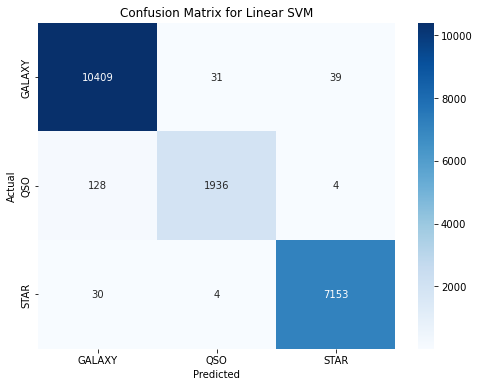

In [15]:
print(classification_report(y_valid, pred_svc))

cm = confusion_matrix(y_valid, pred_svc, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Linear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## Export in csv format 

# Need to transform X_test first.

In [23]:
#y_pred = rf_model_final.predict(X_test)

In [24]:
# prediction = pd.DataFrame(y_pred, columns=['Class'])
# prediction.index.name='Index'
# prediction.to_csv('myprediction.csv') 